In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # to change styles
import matplotlib.style as style

#import magic line to show graphs in jupyter notebook
%matplotlib inline

#need to clean episode 0 that is showing up... 

In [2]:
#formating for seaborn
#style.available

In [3]:
style.use('seaborn')

In [4]:
df = pd.read_csv('atla+lok+tdp.csv',index_col = 0)

In [5]:
df.head()

,title,episode of,season,episode,rating,votes,original air date,year,plot,show_code
0,The Boy in the Iceberg,Avatar: The Last Airbender,1,1,8.101235,2024,2005-02-21,2005,\n The legend of the Avatar is told. Katara...,atla
1,The Avatar Returns,Avatar: The Last Airbender,1,2,8.301235,1773,2005-02-21,2005,\n Aang and Katara inadvertently set off a ...,atla
2,The Southern Air Temple,Avatar: The Last Airbender,1,3,8.501235,1691,2005-02-25,2005,\n After his departure from the Southern Ai...,atla
3,The Warriors of Kyoshi,Avatar: The Last Airbender,1,4,8.201235,1634,2005-03-04,2005,\n The gang arrives at Kyoshi Island and ar...,atla
4,The King of Omashu,Avatar: The Last Airbender,1,5,8.201235,1649,2005-03-18,2005,\n Aang's abilities as an airbender are cha...,atla


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 10 columns):
title                131 non-null object
episode of           131 non-null object
season               131 non-null int64
episode              131 non-null int64
rating               131 non-null float64
votes                131 non-null int64
original air date    131 non-null object
year                 131 non-null int64
plot                 131 non-null object
show_code            131 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 11.3+ KB


In [14]:
# Average Rating by TV Show
df.groupby('episode of')['rating'].mean().sort_values(ascending = False)

episode of
Avatar: The Last Airbender    8.665169
The Legend of Korra           8.641619
The Dragon Prince             8.317901
Name: rating, dtype: float64

In [24]:
#describe returns a df so can index only the columns desired
df.groupby('episode of')['rating'].describe()[['count','mean','std','min','max']].sort_values(by = 'mean',ascending = False)

,count,mean,std,min,max
episode of,,,,,
Avatar: The Last Airbender,61.0,8.665169,0.568927,7.101235,9.801235
The Legend of Korra,52.0,8.641619,0.535874,6.301235,9.601235
The Dragon Prince,18.0,8.317901,0.339983,7.801235,9.101235


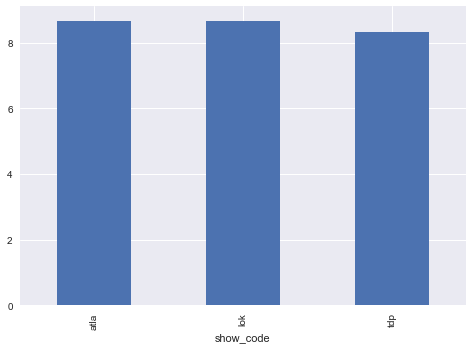

In [26]:
# Average Rating by TV Show
df.groupby('show_code')['rating'].mean().sort_values(ascending = False).plot(kind = 'bar')

In [ ]:
#simple stats tutorial 
#https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/

In [27]:
#is atla significantly better than lok?
#what about tdp?

#Null: Ratings betwween atla & lok is the same
#Alternative: Ratings betwween atla & lok are different
#alpha = .05
from scipy.stats import ttest_ind

In [40]:
# returns 2 values, the calculated t-stat and the two wailed p-value
stat, p = ttest_ind(df['rating'][df['show_code']=='atla'], #data 1
                    df['rating'][df['show_code']=='lok']) #data 2

stat2, p2 = ttest_ind(df['rating'][df['show_code']=='atla'],
                    df['rating'][df['show_code']=='tdp']) #data 2

In [44]:
#atla vs lok
alpha = .05
if p>alpha:
    print(f'The T value was:{stat}. The P value was:{p} Fail to reject null')
else:
    print(f'The T value was:{stat}. P value was:{p} Reject null hypothesis')

The T value was:0.22522504258758916. The P value was:0.8222183372655271 Fail to reject null


In [41]:
#atla vs tdp
alpha = .05
if p>alpha:
    print(f'The T value was:{stat2}. The P value was:{p2} Fail to reject null')
else:
    print(f'The T value was:{stat2}. P value was:{p2} Reject null hypothesis')

P value was:0.0162766265735053 Fail to reject null


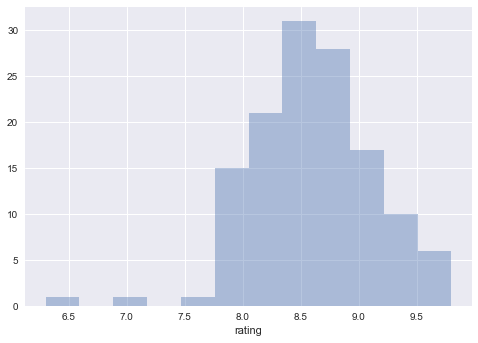

In [45]:
#histogram by overall data
sns.distplot(df['rating'],kde = False)

In [46]:
#what are those two poorly performing episodes?
df[df['rating']<7.5]

#comes from ATLA and LOK, not TDP

,title,episode of,season,episode,rating,votes,original air date,year,plot,show_code
10,The Great Divide,Avatar: The Last Airbender,1,11,7.101235,1593,2005-05-20,2005,\n Aang is tested as the Avatar when he mus...,atla
107,Remembrances,The Legend of Korra,4,8,6.301235,857,2014-11-21,2014,"\n Wu begins his exile with Mako's family, ...",lok


episode of
Avatar: The Last Airbender    AxesSubplot(0.125,0.125;0.775x0.755)
The Dragon Prince             AxesSubplot(0.125,0.125;0.775x0.755)
The Legend of Korra           AxesSubplot(0.125,0.125;0.775x0.755)
Name: rating, dtype: object

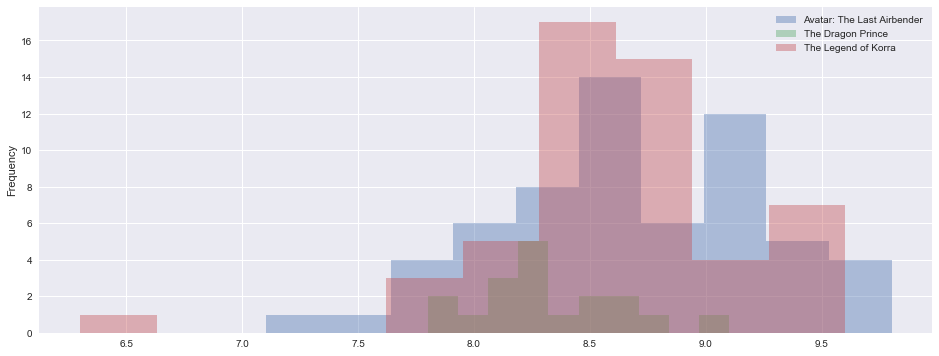

In [47]:
#how does histogram look by show?
plt.figure(figsize = (16,6))
df.groupby('episode of')['rating'].plot(kind = 'hist', alpha = .4, legend = True)

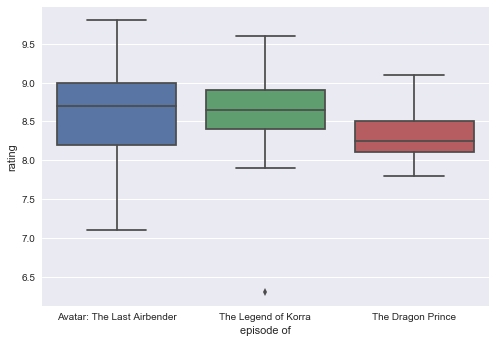

In [48]:
#explore how this looks as a box & whisker
sns.boxplot(x ='episode of',y='rating',data = df)
#Avatar with the most seasons has the widest episode deviation
#Lok has 2 outliers, both from a good and bad perspective
#TDP stays relatively within 8 and 8.5

In [49]:
#could use violin, but actually like the box & whisker better as they deal with outliers better 
#sns.violinplot(x = 'episode of', y = 'rating', data = df)

In [52]:
df.groupby(['episode of','season'])['rating'].describe().sort_values(by = 'std', ascending = True)
#confirmed observations
#TDP has one of the lowest standard deviations after the first season of lok

count      mean       std       min  \
episode of                 season                                        
The Legend of Korra        1        12.0  8.667901  0.293361  8.101235   
The Dragon Prince          1         9.0  8.234568  0.300000  7.801235   
                           2         9.0  8.401235  0.374166  7.801235   
The Legend of Korra        3        13.0  8.824311  0.394026  8.301235   
Avatar: The Last Airbender 2        20.0  8.711235  0.481117  7.601235   
The Legend of Korra        2        14.0  8.401235  0.520355  7.901235   
Avatar: The Last Airbender 3        21.0  8.886949  0.520851  7.801235   
                           1        20.0  8.386235  0.605479  7.101235   
The Legend of Korra        4        13.0  8.693542  0.765356  6.301235   

                                        25%       50%       75%       max  
episode of                 season                                          
The Legend of Korra        1       8.501235  8.651235  8.901235  9.201235  
The Dragon Prince          1       8.101235  8.101235  8.401235  8.801235  
                           2       8.201235  8.301235  8.601235  9.101235  
The Legend of Korra        3       8.601235  8.701235  9.001235  9.601235  
Avatar: The Last Airbender 2       8.501235  8.701235  9.001235  9.601235  
The Legend of Korra        2       8.026235  8.301235  8.576235  9.601235  
Avatar: The Last Airbender 3       8.601235  8.901235  9.201235  9.801235  
                           1       8.001235  8.201235  8.676235  9.801235  
The Legend of Korra        4       8.701235  8.801235  9.101235  9.301235

In [53]:
df2 = df[['show_code','season','episode','rating']].pivot_table(index = ['show_code','season','episode']).copy()

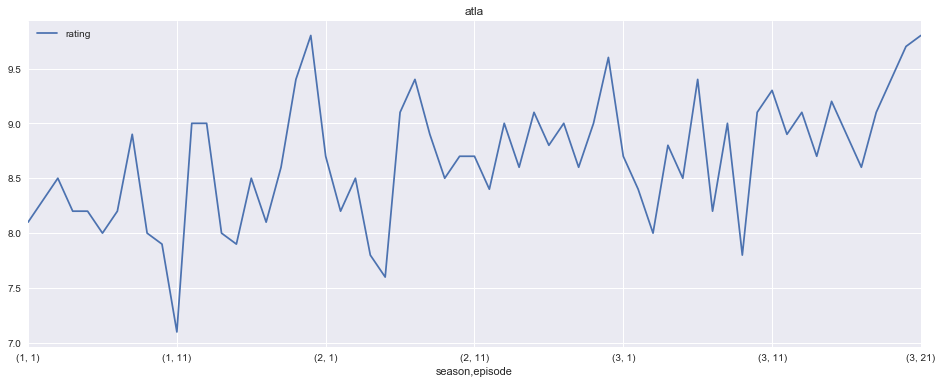

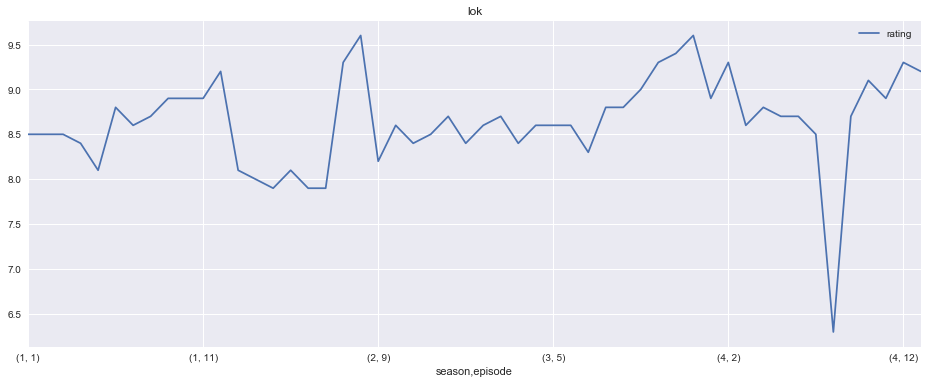

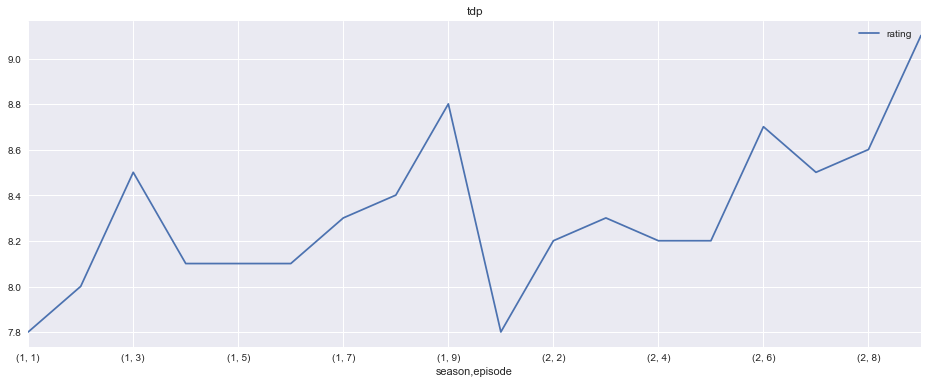

In [55]:
# I did it! Wonder how it woudl look relative to creating a new column with s1-ep1 
# need to make this a bigger and wider... 
#plt.figure(figsize = (16,6))
df2.loc['atla'].plot(figsize = (16,6), title = 'atla')
df2.loc['lok'].plot(figsize = (16,6), title = 'lok')
df2.loc['tdp'].plot(figsize = (16,6), title = 'tdp')

#Show observations 

#atla: tends to hit a relative low point once each season and peaks towards the end of the season
#lok: single episode they really like in season 4
#tdp: tended to get better over time

In [78]:
#atla episodes with a rating of 8 or lower
df[(df['show_code']=='atla') & (df['rating']<=8.0)]

,title,episode of,season,episode,rating,votes,original air date,year,plot,show_code
9,Jet,Avatar: The Last Airbender,1,10,7.901235,1548,2005-05-06,2005,"\n Aang, Katara, and Sokka have their frien...",atla
10,The Great Divide,Avatar: The Last Airbender,1,11,7.101235,1593,2005-05-20,2005,\n Aang is tested as the Avatar when he mus...,atla
14,Bato of the Water Tribe,Avatar: The Last Airbender,1,15,7.901235,1447,2005-10-07,2005,\n Sokka and Katara meet a friend of their ...,atla
23,The Swamp,Avatar: The Last Airbender,2,4,7.801235,1427,2006-04-14,2006,\n Aang hears a swamp calling to him. In th...,atla
24,Avatar Day,Avatar: The Last Airbender,2,5,7.601235,1428,2006-04-28,2006,\n Sokka and Katara have to solve a centuri...,atla
48,Nightmares and Daydreams,Avatar: The Last Airbender,3,9,7.801235,1458,2007-11-16,2007,"\n As the invasion approaches, Aang has rec...",atla


In [71]:
#lok episodes with a rating of 8 or lower
df[(df['show_code']=='lok') & (df['rating']<=8.0)]

#ouch, people really don't like that episode of lok

,title,episode of,season,episode,rating,votes,original air date,year,plot,show_code
75,Civil Wars: Part 1,The Legend of Korra,2,3,7.901235,1170,2013-09-20,2013,\n While tensions flare between the Norther...,lok
77,Peacekeepers,The Legend of Korra,2,5,7.901235,1125,2013-10-04,2013,\n When the President of the United Republi...,lok
78,The Sting,The Legend of Korra,2,6,7.901235,1124,2013-10-11,2013,\n When Triad activity threatens to put Fut...,lok
107,Remembrances,The Legend of Korra,4,8,6.301235,857,2014-11-21,2014,"\n Wu begins his exile with Mako's family, ...",lok


In [74]:
#for tdp, both episodes are the weakest
#means it getts better (but also may not have drawn you in)
df[(df['show_code']=='tdp') & (df['rating']<=8.0)]

,title,episode of,season,episode,rating,votes,original air date,year,plot,show_code
113,Echoes of Thunder,The Dragon Prince,1,1,7.801235,352,2018-09-14,2018,\n As the human kingdom of Katolis braces f...,tdp
122,A Secret and a Spark,The Dragon Prince,2,1,7.801235,208,2019-02-15,2019,"\n Callum, Ezran and Rayla go with Lujanne....",tdp


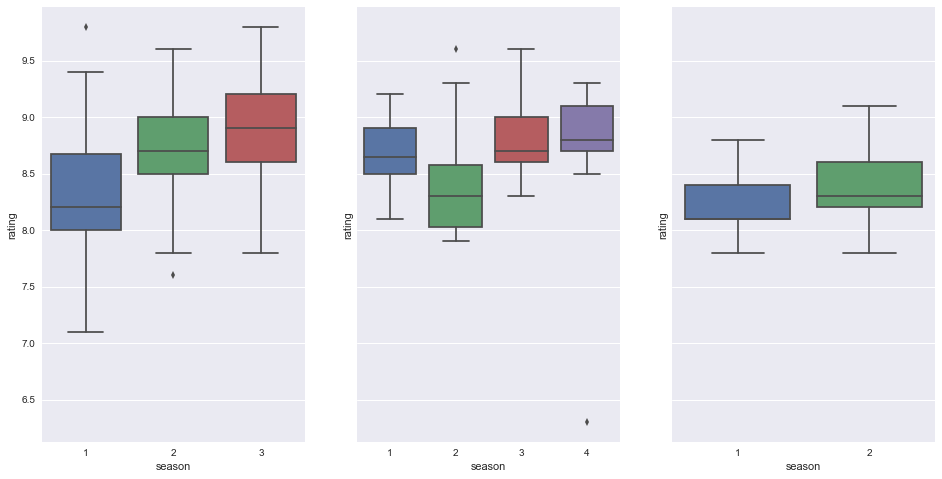

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,8), sharey = True)

sns.boxplot(x ='season',y='rating',data = df[df['show_code']== 'atla'],ax=ax1)
sns.boxplot(x ='season',y='rating',data = df[df['show_code']== 'lok'],ax=ax2)
sns.boxplot(x ='season',y='rating',data = df[df['show_code']== 'tdp'],ax=ax3)

#atla got progressivly better with time across seasons
#people did not like the 2nd season of lok
#tdp season 2 has an edge ovver season 1

In [96]:
show_titles = list(df['episode of'].unique())

In [97]:
print(show_titles)

['Avatar: The Last Airbender', 'The Legend of Korra', 'The Dragon Prince']


Text(0.5, 1.0, 'The Dragon Prince')

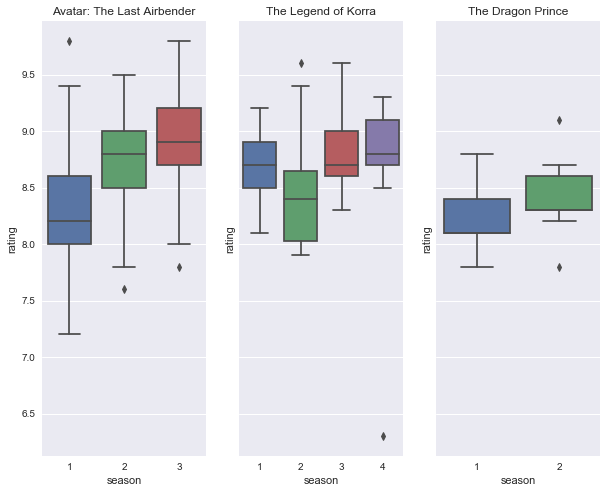

In [98]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,8), sharey = True)


sns.boxplot(x ='season',y='rating',data = df[df['episode of']== 'Avatar: The Last Airbender'],ax=ax1)
ax1.set_title(show_titles[0])

sns.boxplot(x ='season',y='rating',data = df[df['episode of']== 'The Legend of Korra'],ax=ax2)
ax2.set_title(show_titles[1])

sns.boxplot(x ='season',y='rating',data = df[df['episode of']== 'The Dragon Prince'],ax=ax3)
ax3.set_title(show_titles[2])

#need to learn a bit more about subplots & honestly - matplot lib.  Seems like seaborn does things quick. 
#but still need matplot lib to quickly add things like titles, hashmarks, etc. 

#quick tutorial to look at what I need